# Visual Geometry Group (VGG-16) on CIFAR-10

> VGG (Visual Geometry Group) is a deep convolutional neural network architecture designed for image classification. It was introduced by the Visual Geometry Group at the University of Oxford in 2014. The primary motivation behind the VGG network was to explore the impact of depth on the performance of convolutional neural networks (CNNs).

The typical layer-wise structure of VGG16 and VGG19 is as follows:
VGG16:
- 13 Convolutional Layers
- 3 Fully Connected Layers (including the output layer)
VGG19:
- 16 Convolutional Layers
- 3 Fully Connected Layers (including the output layer)
>The “16” and “19” stand for the number of weight layers in the model (paramteric layers)


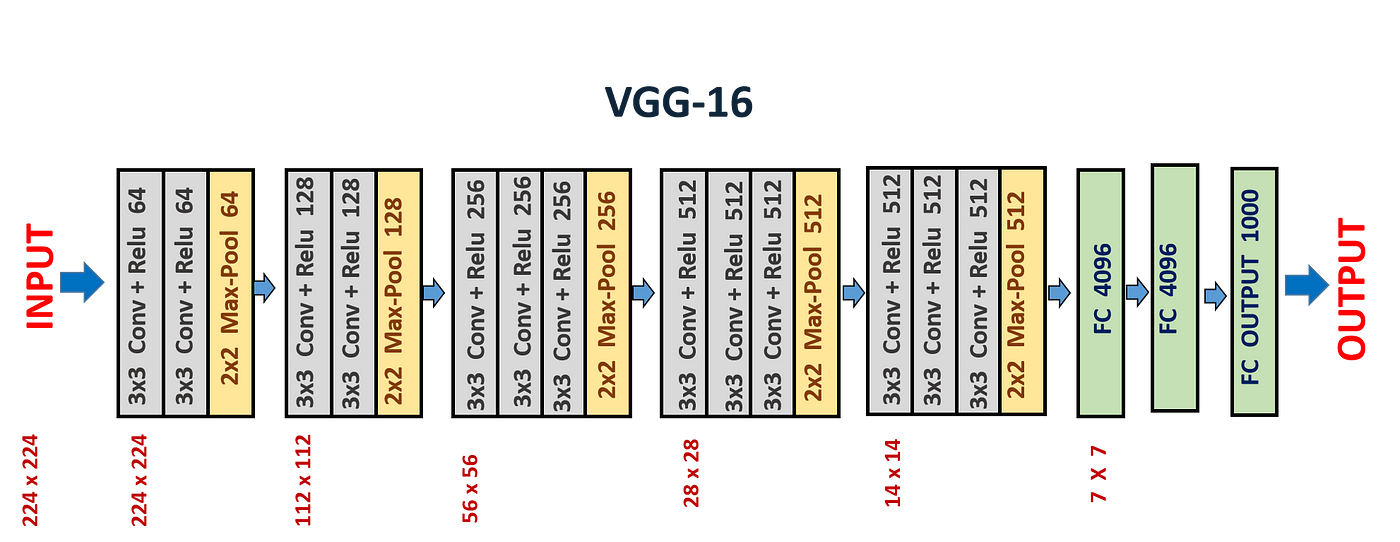

**Architecture Depth**: VGG is known for its simplicity and uniform architecture. .

**Small Convolution Filters**: VGG uses small 3x3 convolutional filters throughout the network. This choice was made to maintain a small receptive field and enable a deeper network.

**Pooling Layers**: VGG incorporates max-pooling layers to downsample the spatial dimensions of the feature maps and increase the receptive field.

**Fully Connected Layers**: The convolutional layers are followed by fully connected layers, leading to the final output layer for classification.

**Activation Function**: Rectified Linear Unit (ReLU) activation functions are used after each convolutional layer to introduce non-linearity.
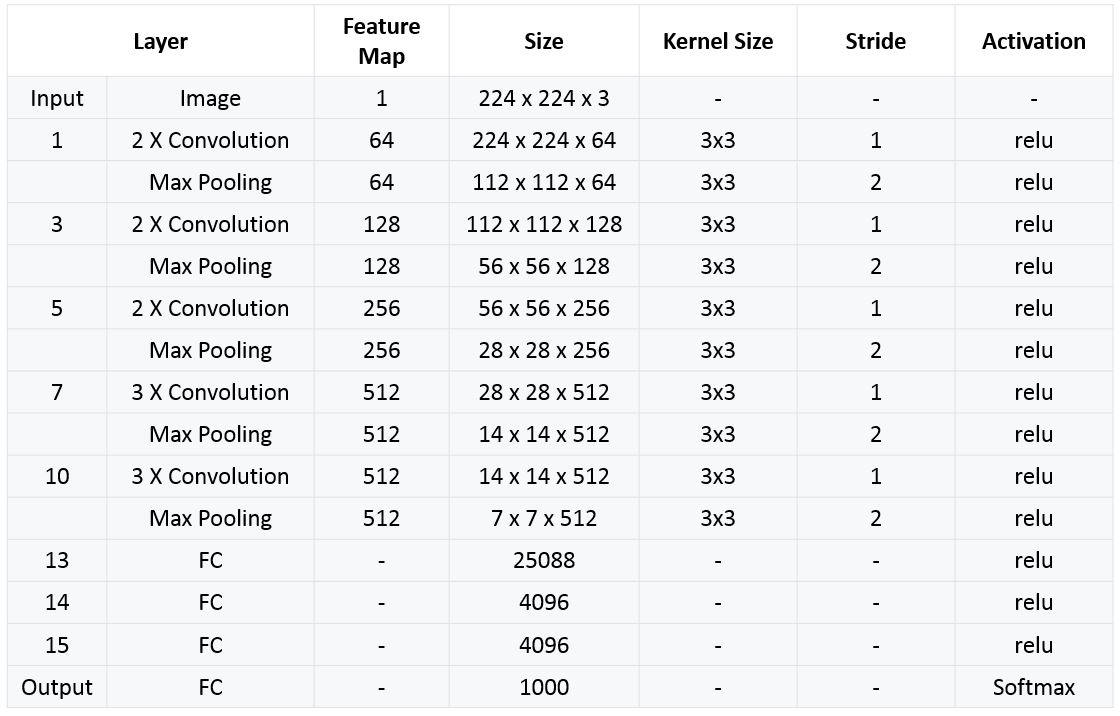

## Cons of VGG:

>Computational Complexity: VGG is computationally expensive due to its deep architecture and large number of parameters. The use of small 3x3 filters contributes to the depth, and while it improves learning capabilities, it increases computational requirements.(smaller filters in CONV layers give larger feature maps but less parameters the filter is a set of weights or parameters for the model convolve over the input in the Convolution)

>Memory Consumption: The deep architecture of VGG requires a significant amount of memory, both during training and inference. This can limit its applicability in resource-constrained environments. (and we can't go deeper because of the cost in RAM , ResNet would solve this later and allow us to build deeper models with less parameters and with a consistent performance deep models with before ResNet more layers can give us less accuracy)

>Overfitting: VGG can be prone to overfitting, especially when applied to smaller datasets. The large number of parameters in the fully connected layers increases the risk of overfitting, and additional regularization techniques may be needed.

In [ ]:
import pandas as pd
import numpy as np
# plotting 
import matplotlib.pyplot as plt 
import seaborn as sns
# for ROC curves 
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
# Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
# models 
from sklearn.ensemble import RandomForestClassifier
# TensorFlow for deep neural neteworks 
import tensorflow as tf 
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
# VGG model 
from tensorflow.keras.applications import VGG16
# Dataset CIFAR-10
from tensorflow.keras import datasets 

import warnings
# Disable all warnings
warnings.filterwarnings("ignore")

# For Data Augmentation  
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading CIFAR-10 dataset 
>CIFAR-10 dataset, including the training and testing sets, using Keras. The dataset consists of 50,000 training images and 10,000 testing images, each of size 32x32 pixels with three color channels (RGB), it has 10 classes that is why its name is CIFAR-10 

In [ ]:
# loading the dataset 
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
train_images.shape, test_images.shape

## Classes we have in the CIFAR-10

0. 'airplane' ✈️ 
1. 'automobile' 🚗
2. 'bird' 🦅 
3. 'cat' 🐈 
4. 'deer' 🦌 
5. 'dog' 🐕 
6. 'frog' 🐸 
7. 'horse' 🐎 
8. 'ship' 🚢 
9. 'truck' 🚛

In [ ]:
# the labels are encoded
train_labels[1]

In [ ]:
plt.imshow(train_images[1]);
# my eyes 😵‍💫 what a quality 

# Utility functions 

In [ ]:
class_labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [ ]:
def show_images(n, datasets=train_images, labels= train_labels):
    num_imgs = n
    plt.figure(figsize=(10,5), dpi=150)
    # if the number of images requested is not divisable by 10 make it divisable ➗✅
    if num_imgs % 10 != 0:
        num_imgs += 10 - (num_imgs%10)
    try:
        print("number of images ploted ", num_imgs)
        for i in range(num_imgs):
            # subplot(nrows, ncols, index, **kwargs)
            plt.subplot(num_imgs//10, 10, i+1)
            plt.imshow(datasets[i])
            plt.title(f'{class_labels[labels[i][0]]}')
            plt.xticks([])
            plt.yticks([])
            plt.tight_layout()
    except Exception as e:
        print(f"Error {e}")

In [ ]:
show_images(50)

# VGG without data augmentation 

In [ ]:
# Preprocess the data
# normalizaion 
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [ ]:
# loading the model 
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# include_top determines whether to include the fully connected layers at the top of the network.
vgg_model.summary()

In [ ]:
# Freeze the layers of the VGG model
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
# adding the FC layers
# Dense layers 
# Create a new model by adding layers on top of VGG
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
# to reduce overfitting 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Train the model with EarlyStopping
history = model.fit(train_images, train_labels, 
                    validation_data=(test_images, test_labels), 
                    epochs=50, batch_size=64,
                    callbacks=[early_stopping])

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# ----------------------------
# Adversarial Attack (RLAB)
# ----------------------------
PATCH_SIZE = 2
NOISE_LEVEL = 0.02 
MAX_STEPS = 5
TOP_K_PATCHES = 10

def get_patches(img, patch_size):
    h, w = img.shape[:2]
    patches = []
    for i in range(0, h - patch_size + 1, patch_size):
        for j in range(0, w - patch_size + 1, patch_size):
            patches.append((i, j))
    return patches

def apply_patch_noise(img, patches, noise_level):
    new_img = img.copy()
    for (i, j) in patches:
        if i + PATCH_SIZE <= img.shape[0] and j + PATCH_SIZE <= img.shape[1]:
            noise = np.random.normal(0, noise_level, (PATCH_SIZE, PATCH_SIZE))
            new_img[i:i+PATCH_SIZE, j:j+PATCH_SIZE, 0] += noise
    return np.clip(new_img, 0, 1)

def l2_dist(img1, img2):
    return np.linalg.norm(img1 - img2)

def rlab_attack_single(model, original_img, original_label, max_time=3):
    if original_img.ndim == 2:
        original_img = np.expand_dims(original_img, -1)

    patches = get_patches(original_img, PATCH_SIZE)
    curr_img = original_img.copy()
    prob = model.predict(curr_img.reshape(1, 28, 28, 1), verbose=0)[0][original_label]
    l2_prev = 0
    start_time = time.time()

    for step in range(MAX_STEPS):
        if time.time() - start_time > max_time:
            break

        patch_scores = []
        for patch in patches:
            temp_img = apply_patch_noise(curr_img, [patch], NOISE_LEVEL)
            pred = model.predict(temp_img.reshape(1, 28, 28, 1), verbose=0)[0]
            new_prob = pred[original_label]
            l2 = l2_dist(original_img, temp_img)
            score = (prob - new_prob) / (l2 - l2_prev + 1e-8)
            patch_scores.append((score, patch))

        patch_scores.sort(reverse=True, key=lambda x: x[0])
        best_patches = [p for _, p in patch_scores[:TOP_K_PATCHES]]
        temp_img = apply_patch_noise(curr_img, best_patches, NOISE_LEVEL)
        pred = model.predict(temp_img.reshape(1, 28, 28, 1), verbose=0)[0]
        new_label = np.argmax(pred)
        curr_img = temp_img
        prob = pred[original_label]
        l2_prev = l2_dist(original_img, temp_img)

        if new_label != original_label:
            break

    return curr_img

# ----------------------------
# Run RLAB on 10 Test Images
# ----------------------------
num_samples = 10
adv_examples = np.zeros((num_samples, 28, 28, 1))
print("Generating adversarial examples...")
for i in range(num_samples):
    img = X_test_actual[i]
    label = np.argmax(y_test[i])
    adv_img = rlab_attack_single(model, img, label, max_time=2)
    adv_examples[i] = adv_img

# ----------------------------
# Evaluate
# ----------------------------
original_preds = model.predict(X_test_actual[:num_samples], verbose=0)
adv_preds = model.predict(adv_examples, verbose=0)

# ----------------------------
# Visualize
# ----------------------------
fig, axs = plt.subplots(2, num_samples, figsize=(20, 4))
for i in range(num_samples):

    axs[1, i].imshow(adv_examples[i].reshape(28, 28), cmap='gray')
    axs[1, i].set_title(f"Adversarial\nTrue: {np.argmax(y_test[i])}, Pred: {np.argmax(adv_preds[i])}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt

# ----------------------------
# Adversarial Attack (RLAB)
# ----------------------------
PATCH_SIZE = 2
NOISE_LEVEL = 0.02 
MAX_STEPS = 5
TOP_K_PATCHES = 10

def get_patches(img, patch_size):
    h, w = img.shape[:2]
    patches = []
    for i in range(0, h - patch_size + 1, patch_size):
        for j in range(0, w - patch_size + 1, patch_size):
            patches.append((i, j))
    return patches

def apply_patch_noise(img, patches, noise_level):
    new_img = img.copy()
    for (i, j) in patches:
        if i + PATCH_SIZE <= img.shape[0] and j + PATCH_SIZE <= img.shape[1]:
            noise = np.random.normal(0, noise_level, (PATCH_SIZE, PATCH_SIZE))
            new_img[i:i+PATCH_SIZE, j:j+PATCH_SIZE, 0] += noise
    return np.clip(new_img, 0, 1)

def l2_dist(img1, img2):
    return np.linalg.norm(img1 - img2)

def rlab_attack_single(model, original_img, original_label, max_time=3):
    if original_img.ndim == 2:
        original_img = np.expand_dims(original_img, -1)

    patches = get_patches(original_img, PATCH_SIZE)
    curr_img = original_img.copy()
    prob = model.predict(curr_img.reshape(1, 28, 28, 1), verbose=0)[0][original_label]
    l2_prev = 0
    start_time = time.time()

    for step in range(MAX_STEPS):
        if time.time() - start_time > max_time:
            break

        patch_scores = []
        for patch in patches:
            temp_img = apply_patch_noise(curr_img, [patch], NOISE_LEVEL)
            pred = model.predict(temp_img.reshape(1, 28, 28, 1), verbose=0)[0]
            new_prob = pred[original_label]
            l2 = l2_dist(original_img, temp_img)
            score = (prob - new_prob) / (l2 - l2_prev + 1e-8)
            patch_scores.append((score, patch))

        patch_scores.sort(reverse=True, key=lambda x: x[0])
        best_patches = [p for _, p in patch_scores[:TOP_K_PATCHES]]
        temp_img = apply_patch_noise(curr_img, best_patches, NOISE_LEVEL)
        pred = model.predict(temp_img.reshape(1, 28, 28, 1), verbose=0)[0]
        new_label = np.argmax(pred)
        curr_img = temp_img
        prob = pred[original_label]
        l2_prev = l2_dist(original_img, temp_img)

        if new_label != original_label:
            break

    return curr_img

# ----------------------------
# Feature Squeezing (e.g., 5-bit quantization)
# ----------------------------
def feature_squeeze(X, bits=5):
    levels = 2 ** bits
    return np.floor(X * levels) / levels

# ----------------------------
# ARBD Defense Training Function
# ----------------------------
def train_with_arbd(model, X_train, y_train, num_samples=500, epochs=5, batch_size=64):
    X_adv = np.zeros((num_samples, 28, 28, 1), dtype=np.float32)
    for i in range(num_samples):
        img = X_train[i].reshape(28, 28)
        label = np.argmax(y_train[i])
        adv_img = rlab_attack_single(model, img, label, max_time=3)
        X_adv[i] = adv_img.reshape(28, 28, 1)

    X_squeezed = feature_squeeze(X_train[:num_samples])
    X_adv_squeezed = feature_squeeze(X_adv)
    y_subset = y_train[:num_samples]

    X_combined = np.concatenate([X_squeezed, X_adv_squeezed])
    y_combined = np.concatenate([y_subset, y_subset])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_combined, y_combined, epochs=epochs, batch_size=batch_size)
    return model

# ----------------------------
# Train model with ARBD
# ----------------------------
model = train_with_arbd(model, X_train, y_train, num_samples=1000, epochs=5)

# ----------------------------
# Run RLAB on 10 Test Images
# ----------------------------
num_samples = 10
adv_examples = np.zeros((num_samples, 28, 28, 1))
print("Generating adversarial examples...")
for i in range(num_samples):
    img = X_test_actual[i]
    label = np.argmax(y_test[i])
    adv_img = rlab_attack_single(model, img, label, max_time=2)
    adv_examples[i] = adv_img

# ----------------------------
# Evaluate
# ----------------------------
original_preds = model.predict(X_test_actual[:num_samples], verbose=0)
adv_preds = model.predict(adv_examples, verbose=0)

# ----------------------------
# Visualize
# ----------------------------
fig, axs = plt.subplots(2, num_samples, figsize=(20, 4))
for i in range(num_samples):
    axs[1, i].imshow(adv_examples[i].reshape(28, 28), cmap='gray')
    axs[1, i].set_title(f"Adversarial\nTrue: {np.argmax(y_test[i])}, Pred: {np.argmax(adv_preds[i])}")
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()
